**TASK - 1**

**1.	Develop a model which predict the price of used cars**

**I. Data Collection**

**Dataset:** used_car_dataset.csv

**Description of the Dataset**:

This dataset contains information on used cars for sale, including model name, year of manufacturing, Km driven, price, and fuel type. The dataset can be used for a variety of applications such as price prediction, trend analysis, and market research.

**II. Data Preprocessing and Cleaning**

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import re

In [62]:
from google.colab import files
uploaded = files.upload()

Saving used_car_dataset.csv to used_car_dataset (1).csv


In [63]:
df = pd.read_csv('used_car_dataset.csv')
df

,car_name,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture
0,Hyundai Grand i10 Magna 1.2 Kappa VTVT [2017-2...,₹ 4.45 Lakh,"22,402 km",Petrol,Mumbai,2016
1,Maruti Suzuki Alto 800 Lxi,₹ 2.93 Lakh,"10,344 km",Petrol,Kolkata,2019
2,Tata Safari XZ Plus New,₹ 22.49 Lakh,"12,999 km",Diesel,Bangalore,2021
3,Maruti Suzuki Ciaz ZXI+,₹ 6.95 Lakh,"45,000 km",Petrol,Thane,2016
4,Jeep Compass Sport Plus 1.4 Petrol [2019-2020],₹ 12 Lakh,"11,193 km",Petrol,Kolkata,2019
...,...,...,...,...,...,...
2100,Ford Figo Titanium1.5 TDCi,₹ 3.6 Lakh,"42,158 km",Diesel,Kolkata,2015
2101,MINI Cooper Countryman Cooper D,₹ 22 Lakh,"68,862 km",Diesel,Hyderabad,2013
2102,Hyundai Verna 1.6 VTVT SX,₹ 8.38 Lakh,"37,622 km",Petrol,Chennai,2018
2103,Maruti Suzuki Ciaz VXi+ AT,₹ 6.75 Lakh,"64,726 km",Petrol,Mumbai,2017


In [64]:
df.head()

,car_name,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture
0,Hyundai Grand i10 Magna 1.2 Kappa VTVT [2017-2...,₹ 4.45 Lakh,"22,402 km",Petrol,Mumbai,2016
1,Maruti Suzuki Alto 800 Lxi,₹ 2.93 Lakh,"10,344 km",Petrol,Kolkata,2019
2,Tata Safari XZ Plus New,₹ 22.49 Lakh,"12,999 km",Diesel,Bangalore,2021
3,Maruti Suzuki Ciaz ZXI+,₹ 6.95 Lakh,"45,000 km",Petrol,Thane,2016
4,Jeep Compass Sport Plus 1.4 Petrol [2019-2020],₹ 12 Lakh,"11,193 km",Petrol,Kolkata,2019


In [65]:
df.tail()

,car_name,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture
2100,Ford Figo Titanium1.5 TDCi,₹ 3.6 Lakh,"42,158 km",Diesel,Kolkata,2015
2101,MINI Cooper Countryman Cooper D,₹ 22 Lakh,"68,862 km",Diesel,Hyderabad,2013
2102,Hyundai Verna 1.6 VTVT SX,₹ 8.38 Lakh,"37,622 km",Petrol,Chennai,2018
2103,Maruti Suzuki Ciaz VXi+ AT,₹ 6.75 Lakh,"64,726 km",Petrol,Mumbai,2017
2104,Hyundai Verna 1.6 VTVT SX,₹ 8.76 Lakh,"29,150 km",Petrol,Pune,2017


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105 entries, 0 to 2104
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   car_name             2105 non-null   object
 1   car_price_in_rupees  2105 non-null   object
 2   kms_driven           2105 non-null   object
 3   fuel_type            2105 non-null   object
 4   city                 2105 non-null   object
 5   year_of_manufacture  2105 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 98.8+ KB


In [67]:
df.isnull()

,car_name,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
2100,False,False,False,False,False,False
2101,False,False,False,False,False,False
2102,False,False,False,False,False,False
2103,False,False,False,False,False,False


In [68]:
df.describe()

,year_of_manufacture
count,2105.000000
mean,2017.022803
std,2.818066
min,2004.000000
25%,2015.000000
50%,2017.000000
75%,2019.000000
max,2022.000000


In [69]:
df.shape

(2105, 6)

In [70]:
df.describe(include = 'all')

,car_name,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture
count,2105,2105,2105,2105,2105,2105.000000
unique,946,811,1628,8,16,NaN
top,Maruti Suzuki Wagon R 1.0 VXI,₹ 4.75 Lakh,"45,000 km",Petrol,Bangalore,NaN
freq,25,23,17,1348,248,NaN
mean,NaN,NaN,NaN,NaN,NaN,2017.022803
std,NaN,NaN,NaN,NaN,NaN,2.818066
min,NaN,NaN,NaN,NaN,NaN,2004.000000
25%,NaN,NaN,NaN,NaN,NaN,2015.000000
50%,NaN,NaN,NaN,NaN,NaN,2017.000000
75%,NaN,NaN,NaN,NaN,NaN,2019.000000


**Plotting Histogram Plot**

<Axes: ylabel='Frequency'>

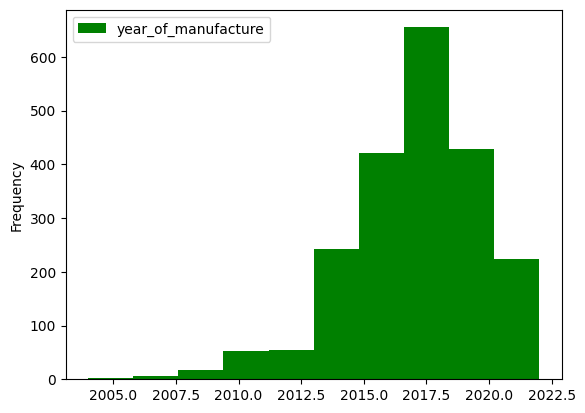

In [71]:
df.plot.hist(color = 'green')

**III. FEATURE SELECTION**

In [72]:
df1 = df.copy()
# Create a copy of the DataFrame
df1 = df.copy()

# We Extract only the brand name from the 'car_name' column by applying lambda function
df1['car_name'] = df['car_name'].apply(lambda x: x.split(' ')[0])

# Drop the 'city' column from the DataFrame
df1.drop(['city'], axis=1, inplace=True)

# Define a function to convert car price values
def convert(x):
    if ',' in x:
        # If the price contains a comma, split the string and remove the comma
        s = x.split(' ')[1].split(',')
        # Join the separated parts and convert to float
        return float(s[0] + s[1])
    else:
        value = float(x.split(' ')[1])
        return value * 100000

# Again Create another copy of the DataFrame
df2 = df1.copy()

# Apply the conversion function to the 'car_price_in_rupees' column
df2['car_price_in_rupees'] = df['car_price_in_rupees'].apply(convert)

# Display the first few rows of the processed DataFrame
print(df2.head())

  car_name  car_price_in_rupees kms_driven fuel_type  year_of_manufacture
0  Hyundai             445000.0  22,402 km    Petrol                 2016
1   Maruti             293000.0  10,344 km    Petrol                 2019
2     Tata            2249000.0  12,999 km    Diesel                 2021
3   Maruti             695000.0  45,000 km    Petrol                 2016
4     Jeep            1200000.0  11,193 km    Petrol                 2019


In [73]:
df3 = df2.copy()
df3.head()

,car_name,car_price_in_rupees,kms_driven,fuel_type,year_of_manufacture
0,Hyundai,445000.0,"22,402 km",Petrol,2016
1,Maruti,293000.0,"10,344 km",Petrol,2019
2,Tata,2249000.0,"12,999 km",Diesel,2021
3,Maruti,695000.0,"45,000 km",Petrol,2016
4,Jeep,1200000.0,"11,193 km",Petrol,2019


In [74]:
df4 = df3.copy()
df4['kms_driven'] = df3['kms_driven'][df3['kms_driven'].str.len() > 4]
def removeComma(x):
    if ',' in x :
        s = x.split(',')
        return float(s[0] + s[1])
df4 = df3.copy()

# Remove Not a number(NaN) values from the 'kms_driven' column
df4.kms_driven = df4.kms_driven.dropna()
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105 entries, 0 to 2104
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   car_name             2105 non-null   object 
 1   car_price_in_rupees  2105 non-null   float64
 2   kms_driven           2105 non-null   object 
 3   fuel_type            2105 non-null   object 
 4   year_of_manufacture  2105 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 82.4+ KB


In [75]:
#Using the numpy module to enter the price values till infinity and labelling them
prices_ranges = [0, 500000, 1000000, 1500000, np.inf]
prices_labels = ['Low', 'Medium', 'High', 'Very High']
df3['price_category'] = pd.cut(df3['car_price_in_rupees'], bins=prices_ranges, labels=prices_labels)
df3.head()

,car_name,car_price_in_rupees,kms_driven,fuel_type,year_of_manufacture,price_category
0,Hyundai,445000.0,"22,402 km",Petrol,2016,Low
1,Maruti,293000.0,"10,344 km",Petrol,2019,Low
2,Tata,2249000.0,"12,999 km",Diesel,2021,Very High
3,Maruti,695000.0,"45,000 km",Petrol,2016,Medium
4,Jeep,1200000.0,"11,193 km",Petrol,2019,High


In [76]:
#Using the concept of One-hot encoding
X = df3.drop('price_category', axis=1)
X = pd.get_dummies(X, columns=['car_name', 'fuel_type'], drop_first=True)  # One-hot encoding
y = df3['price_category']
X.head()

,car_price_in_rupees,kms_driven,year_of_manufacture,car_name_BMW,car_name_Bentley,car_name_Chevrolet,car_name_Citroen,car_name_Datsun,car_name_Fiat,car_name_Ford,...,car_name_Toyota,car_name_Volkswagen,car_name_Volvo,fuel_type_Diesel,fuel_type_Diesel + 1,fuel_type_Electric,fuel_type_Hybrid,fuel_type_LPG,fuel_type_Petrol,fuel_type_Petrol + 1
0,445000.0,"22,402 km",2016,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,293000.0,"10,344 km",2019,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2249000.0,"12,999 km",2021,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,695000.0,"45,000 km",2016,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1200000.0,"11,193 km",2019,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


**IV. DATA SPLITTING**

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [78]:
split_ratios = [(0.7, 0.3), (0.6, 0.4), (0.5, 0.5), (0.8, 0.2)]
results = []

# Iterate over each split ratio
for train_ratio, test_ratio in split_ratios:
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_ratio, random_state=42)
#check data types
print(X_train.dtypes)
print(y_train.dtypes)
#Verify non numerical data
for i in range(len(X_train.columns)):
    if X_train.dtypes[i] == 'object':
        print(X_train.columns[i])
        print(X_train[X_train.columns[i]].value_counts())


car_price_in_rupees       float64
kms_driven                 object
year_of_manufacture         int64
car_name_BMW                uint8
car_name_Bentley            uint8
car_name_Chevrolet          uint8
car_name_Citroen            uint8
car_name_Datsun             uint8
car_name_Fiat               uint8
car_name_Ford               uint8
car_name_Honda              uint8
car_name_Hyundai            uint8
car_name_Isuzu              uint8
car_name_Jaguar             uint8
car_name_Jeep               uint8
car_name_Kia                uint8
car_name_Land               uint8
car_name_MG                 uint8
car_name_MINI               uint8
car_name_Mahindra           uint8
car_name_Maruti             uint8
car_name_Mercedes-Benz      uint8
car_name_Nissan             uint8
car_name_Porsche            uint8
car_name_Renault            uint8
car_name_Skoda              uint8
car_name_Tata               uint8
car_name_Toyota             uint8
car_name_Volkswagen         uint8
car_name_Volvo

**DATA VISUALIZATION**

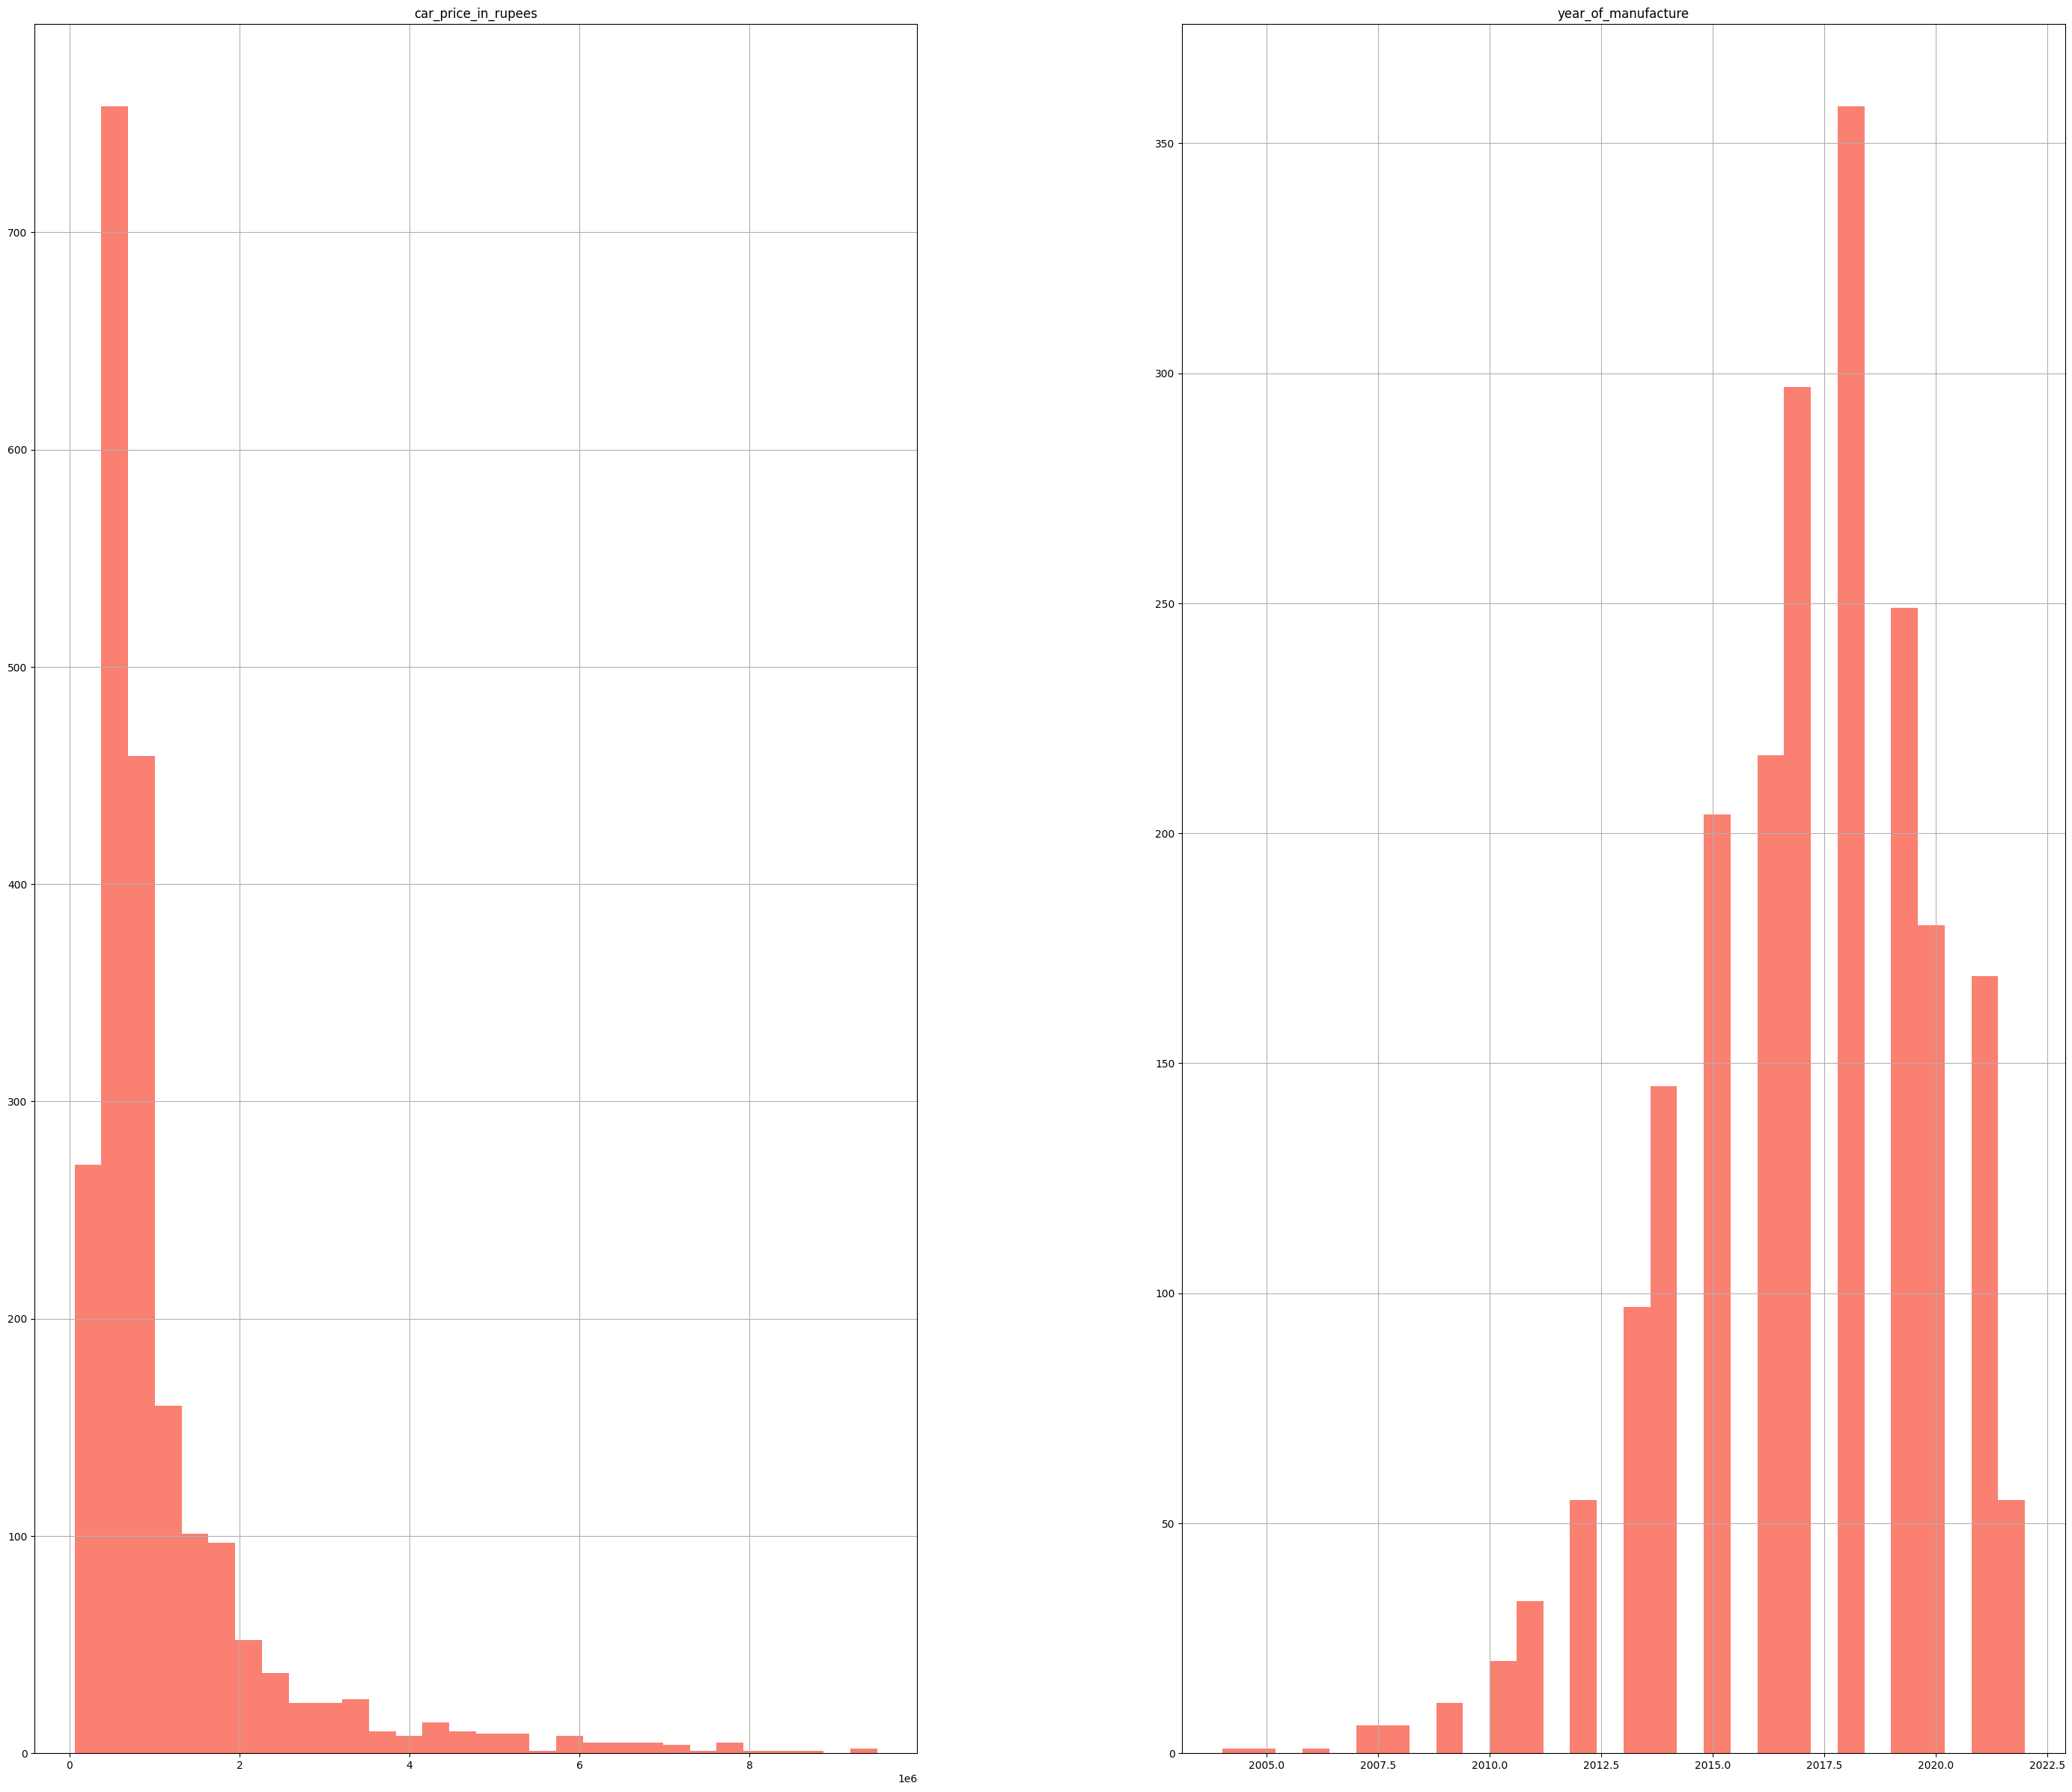

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

df3.hist(figsize=(35, 30), bins=30, color='salmon', legend=False)
plt.show()


In [80]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105 entries, 0 to 2104
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   car_name             2105 non-null   object  
 1   car_price_in_rupees  2105 non-null   float64 
 2   kms_driven           2105 non-null   object  
 3   fuel_type            2105 non-null   object  
 4   year_of_manufacture  2105 non-null   int64   
 5   price_category       2105 non-null   category
dtypes: category(1), float64(1), int64(1), object(3)
memory usage: 84.6+ KB


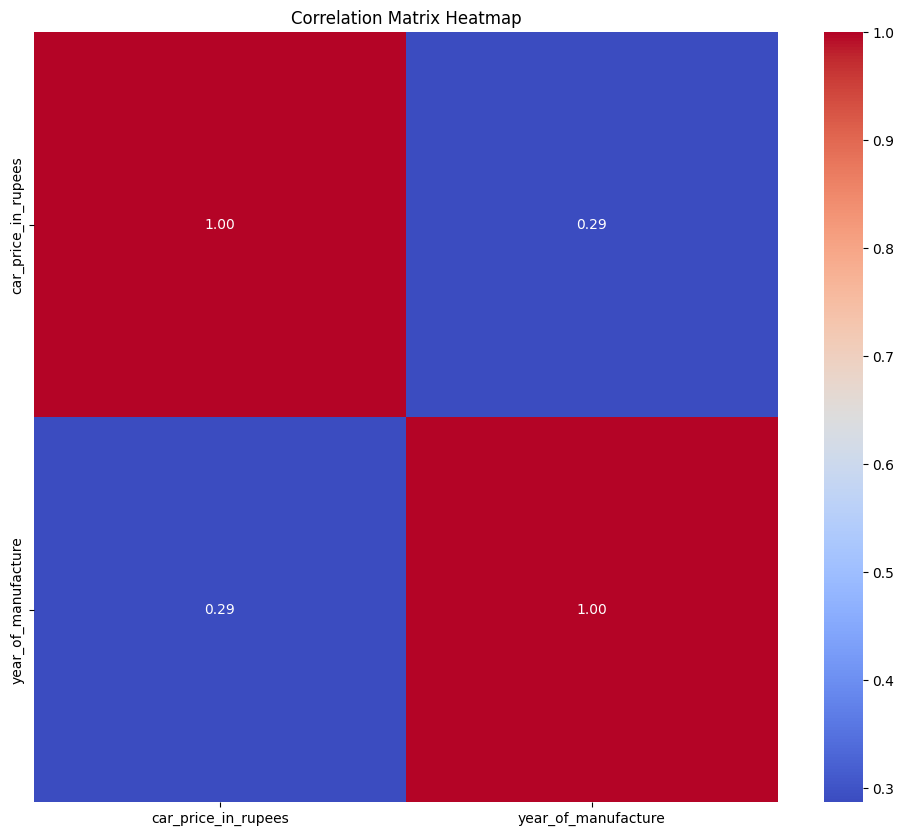

In [81]:
# Exclude non-numeric columns
numeric_columns = df3.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Set title and display the plot
plt.title('Correlation Matrix Heatmap', fontsize=12)
plt.show()